In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix

# BMI CALCULATOR
200 enteries for height ans weight
and calculator the BMI
and then categories as Slim , Normal , Fat

In [2]:
np.random.seed(50)
height=np.random.randint(140,200,200)
weight=np.random.randint(40,120,200)
bmi=weight/((height/100)**2)

BMI=pd.DataFrame({"HEIGHT":height, "WEIGHT":weight, "BMI":bmi})
BMI

,HEIGHT,WEIGHT,BMI
0,188,104,29.425079
1,172,118,39.886425
2,151,92,40.349107
3,185,66,19.284149
4,173,85,28.400548
...,...,...,...
195,154,87,36.684095
196,196,99,25.770512
197,142,70,34.715334
198,180,103,31.790123


In [3]:
np.random.seed(50)
height=np.random.randint(140,200,200)
weight=np.random.randint(40,120,200)
bmi=weight/((height/100)**2)
def category(bmi):
    bmi = float(bmi)
    if bmi <= 19:
        return "You are Slim "
    elif bmi <= 25 and bmi > 19:
        return "You are Perfectly Fit"
    else:
        return "Over Weight : You need Gym"
BMI["Category"] = BMI["BMI"].apply(category)
BMI
category=np.array([category(b) for b in bmi])
category

array(['Over Weight : You need Gym', 'Over Weight : You need Gym',
       'Over Weight : You need Gym', 'You are Perfectly Fit',
       'Over Weight : You need Gym', 'Over Weight : You need Gym',
       'Over Weight : You need Gym', 'Over Weight : You need Gym',
       'Over Weight : You need Gym', 'Over Weight : You need Gym',
       'Over Weight : You need Gym', 'Over Weight : You need Gym',
       'Over Weight : You need Gym', 'Over Weight : You need Gym',
       'Over Weight : You need Gym', 'You are Slim ',
       'Over Weight : You need Gym', 'Over Weight : You need Gym',
       'You are Perfectly Fit', 'Over Weight : You need Gym',
       'You are Perfectly Fit', 'Over Weight : You need Gym',
       'Over Weight : You need Gym', 'Over Weight : You need Gym',
       'You are Perfectly Fit', 'Over Weight : You need Gym',
       'You are Perfectly Fit', 'You are Perfectly Fit',
       'Over Weight : You need Gym', 'Over Weight : You need Gym',
       'Over Weight : You need Gym', '

In [4]:
L_C=LabelEncoder()
BMI["Category"] = L_C.fit_transform(BMI["Category"])

In [5]:
x= BMI[["HEIGHT","WEIGHT"]]
y=BMI["Category"]

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state=50)

In [7]:
print(X_train,Y_train)

     HEIGHT  WEIGHT
114     190      64
187     166      86
76      185     118
122     198      91
142     141      40
..      ...     ...
132     157      50
33      140     102
109     184      79
139     199      94
176     149      95

[140 rows x 2 columns] 114    2
187    0
76     0
122    1
142    1
      ..
132    1
33     0
109    1
139    1
176    0
Name: Category, Length: 140, dtype: int64


In [8]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

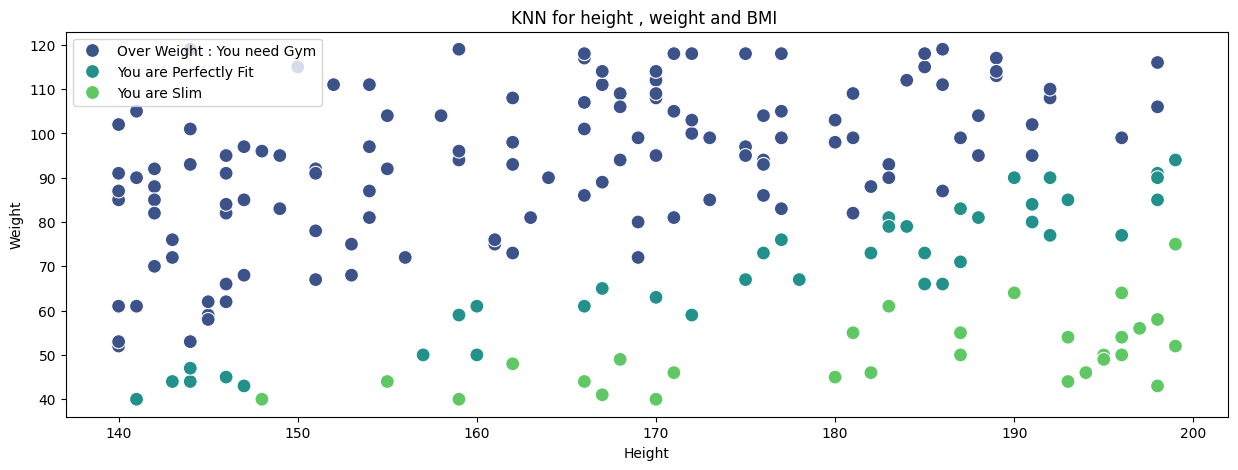

In [9]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=x,x=height,y=weight,hue=L_C.inverse_transform(y),palette="viridis",s=100)
plt.title("KNN for height , weight and BMI ")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()

Enter your Height in cm:  170
Enter your Weight in kg:  40


Distance = [[ 3.16227766  5.65685425  6.08276253 11.        ]]


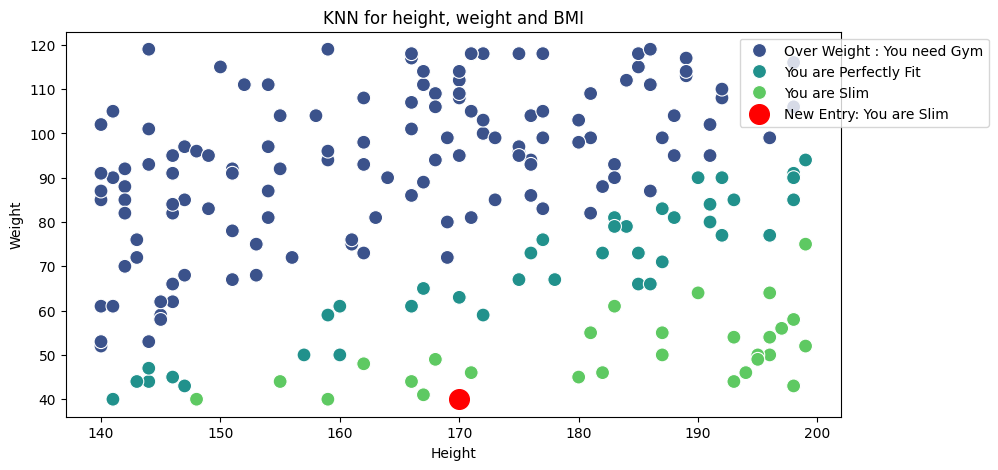

Height = 170.0 | Weight = 40.0 | Predicted Category = You are Slim  


In [14]:
def predictBMI(data,model,L_C):
    p= model.predict(data)
    P_C = L_C.inverse_transform(p)[0]
    return P_C
user_H =float(input("Enter your Height in cm: "))
user_W =float(input("Enter your Weight in kg: "))

input_data = np.array([[user_H, user_W]])
predicted_Category = predictBMI(input_data,model,L_C)

D,I = model.kneighbors(input_data,n_neighbors = 4)

print(f"Distance = {D}")

plt.figure(figsize = (10,5))
# Training data plot
sns.scatterplot(data=x,x=height,y=weight,hue=L_C.inverse_transform(y),palette = "viridis", s =100)

# Input data plot
plt.scatter(input_data[0,0], input_data[0,1],color = 'red',s =200, label = f'New Entry: {predicted_Category}')
plt.title("KNN for height, weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc = "upper right", bbox_to_anchor = (1,0.2,0.2,0.8))
plt.show()
print(f"Height = {user_H} | Weight = {user_W} | Predicted Category = {predicted_Category} ")